In [1]:
# importing naecesarry libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv(r'UNSW_NB15_training-set.csv')

C:\Users\0819\AppData\Local\Temp\ipykernel_7252\4045581266.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'UNSW_NB15_training-set.csv')


In [3]:
df.shape

(82332, 45)

In [4]:
#Let's print the first 5 records of the data set
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [5]:
#Let's print the last 5 records of the dataset 
df.tail()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82331,82332,0.000009,udp,-,INT,2,0,104,0,111111.107200,...,1,1,0,0,0,1,1,0,Normal,0


In [6]:
#Let's print the column name
df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpin', 'b', 'dtcpb',
       'dwtcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [7]:
df['attack_cat'].value_counts()

attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64

In [8]:
# shape of the dataset
df.shape


(82332, 45)

In [9]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
82327    False
82328    False
82329    False
82330    False
82331    False
Length: 82332, dtype: bool

In [10]:

#Let's print the total number of duplicated value
df.duplicated().sum()

0

In [11]:
#Let's print the unique values in our dataset
df.nunique()

id                   82332
dur                  39888
proto                  131
service                 13
state                    7
spkts                  420
dpkts                  436
sbytes                4489
dbytes                4034
rate                 40616
sttl                    16
dttl                     8
sload                42873
dload                40614
sloss                  253
dloss                  311
sinpkt               39970
dinpkt               37617
sjit                 39944
djit                 38381
swin                    11
stcpin               39219
b                    39108
dtcpb                   14
dwtcprtt             26130
synack               24934
ackdat               24020
smean                 1282
dmean                 1222
trans_depth              8
response_body_len     1190
ct_srv_src              57
ct_state_ttl             7
ct_dst_ltm              50
ct_src_dport_ltm        50
ct_dst_sport_ltm        33
ct_dst_src_ltm          57
i

In [12]:
#Let's print the data types in our data
df.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                  object
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpin                 int64
b                      int64
dtcpb                  int64
dwtcprtt             float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [13]:
#descriptive statistics summary
df.describe

<bound method NDFrame.describe of           id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0          1  0.000011   udp       -   INT      2      0     496       0   
1          2  0.000008   udp       -   INT      2      0    1762       0   
2          3  0.000005   udp       -   INT      2      0    1068       0   
3          4  0.000006   udp       -   INT      2      0     900       0   
4          5  0.000010   udp       -   INT      2      0    2126       0   
...      ...       ...   ...     ...   ...    ...    ...     ...     ...   
82327  82328  0.000005   udp       -   INT      2      0     104       0   
82328  82329  1.106101   tcp       -   FIN     20      8   18062     354   
82329  82330  0.000000   arp       -   INT      1      0      46       0   
82330  82331  0.000000   arp       -   INT      1      0      46       0   
82331  82332  0.000009   udp       -   INT      2      0     104       0   

                rate  ... ct_dst_sport_ltm  ct_dst_sr

In [14]:
#Let's get the overall information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  object 
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [15]:
#Let's check the total number of null values present in our dataset 
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpin               0
b                    0
dtcpb                0
dwtcprtt             0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

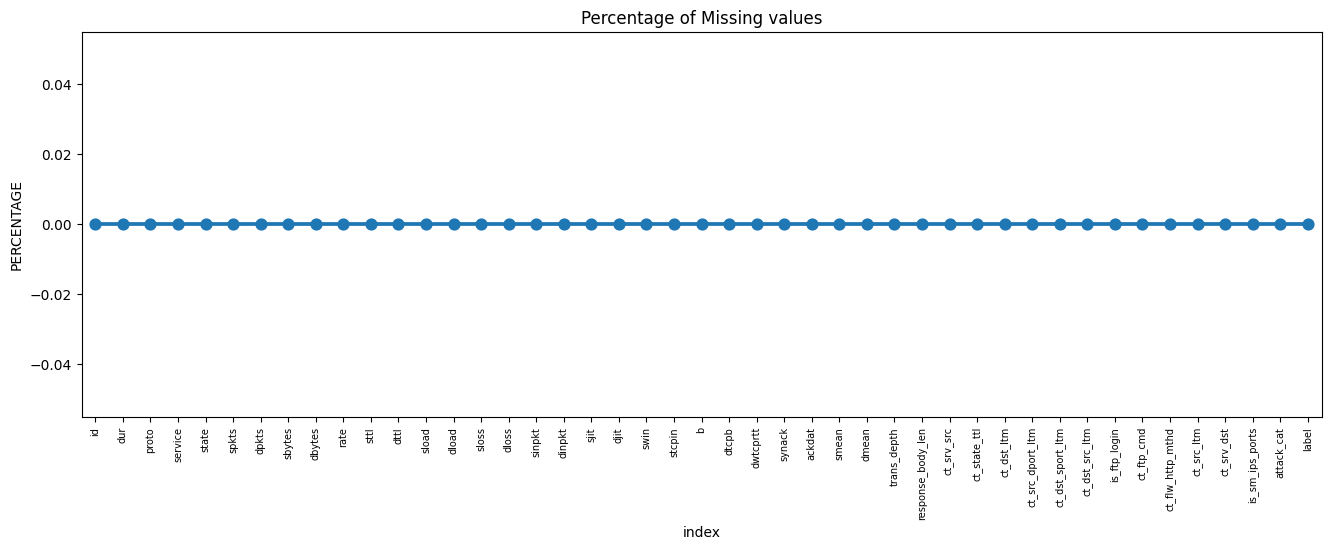

In [16]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

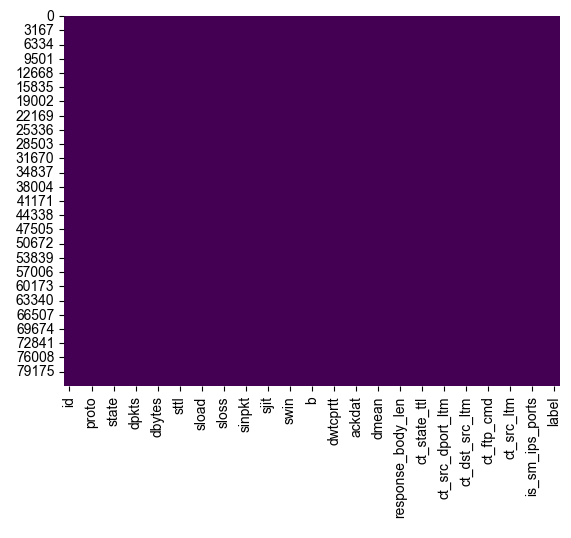

In [17]:

# Create heatmap with missing values in DataFrame highlighted
sns.heatmap(df.isnull(), cbar=False,cmap='viridis')
sns.set(rc={'figure.figsize':(10,5)})

# **BOXPLOT**

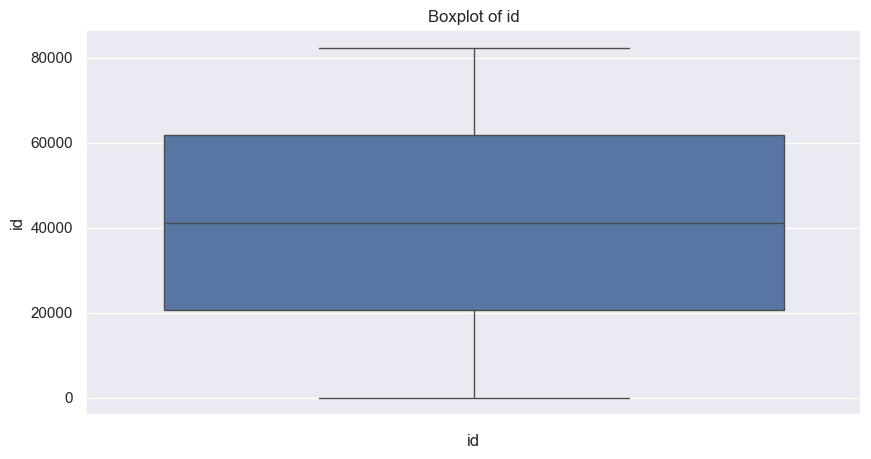

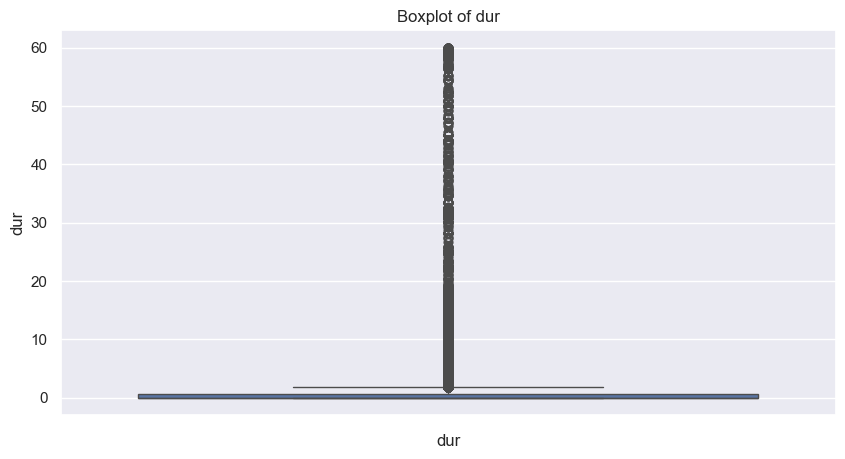

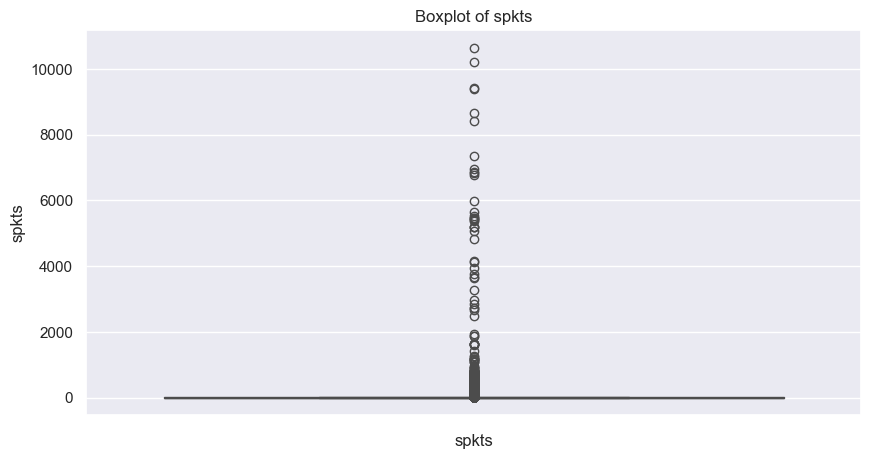

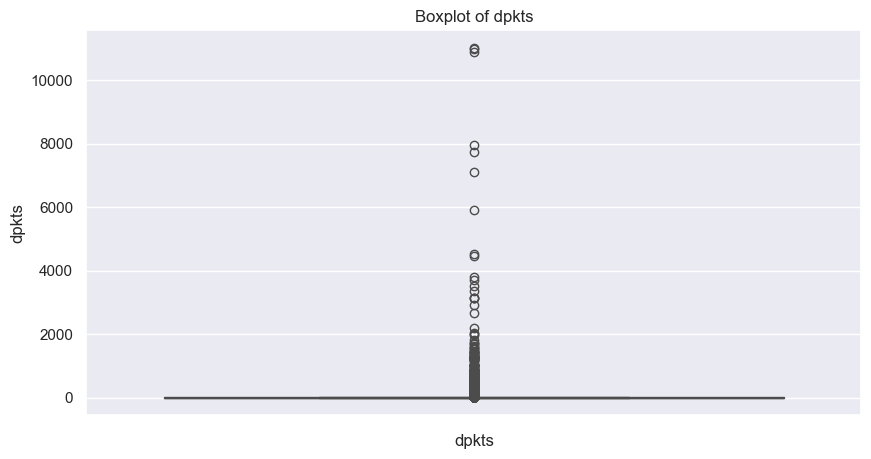

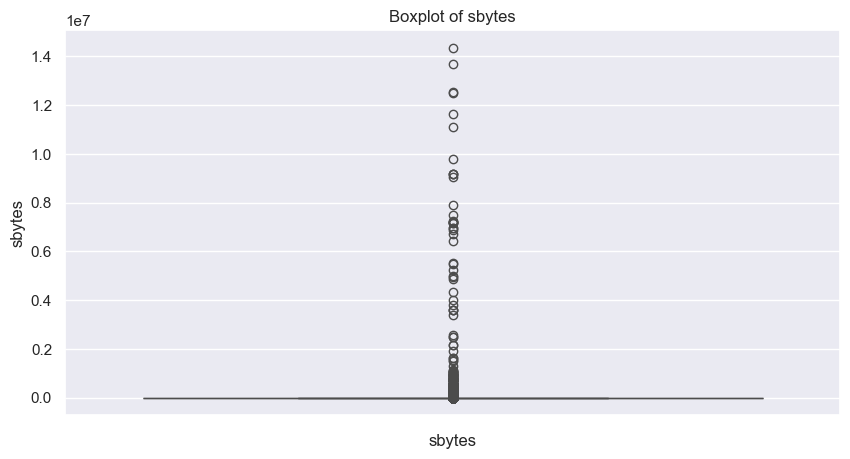

In [18]:
# Get the numerical columns of the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a boxplot for each numerical column
for column in numerical_columns[:5]:
    plt.figure()  # Create a new figure for each boxplot
    sns.boxplot(data=df[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

# Display the boxplots
plt.show()

# **REMOVING OUTLIERS**

In [8]:
# Get the numerical columns of the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Define the function to remove outliers using the IQR method
def remove_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Iterate over each numerical column and remove outliers
for column in numerical_columns:
    remove_outliers_iqr(column)

# **BOXPLOT**

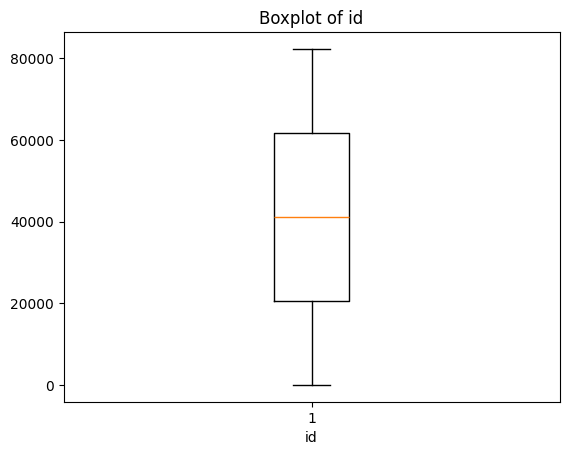

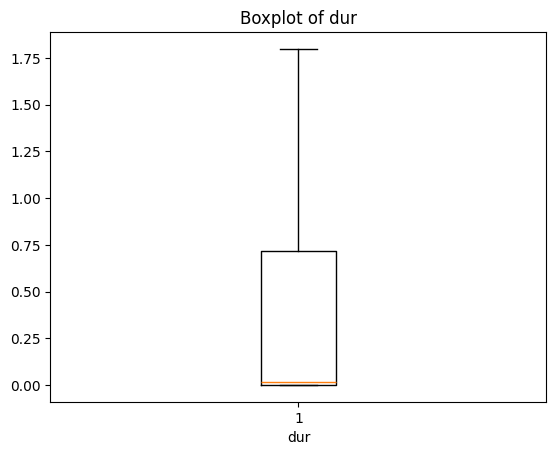

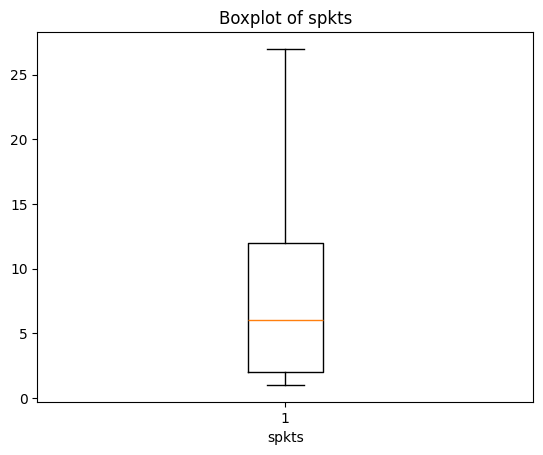

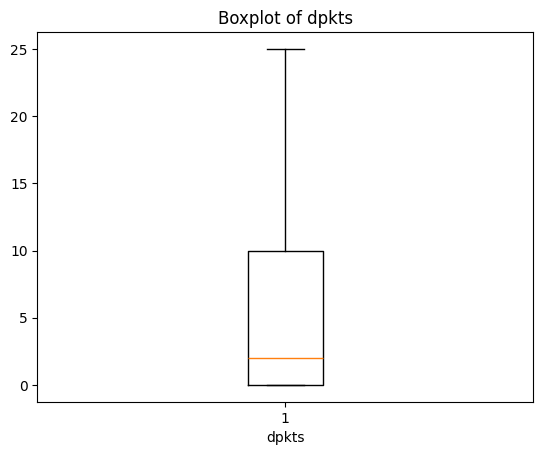

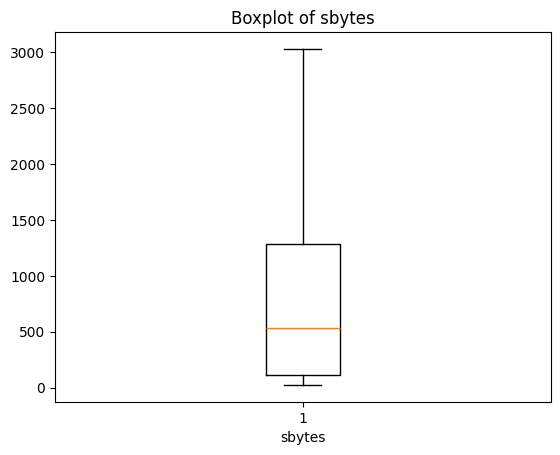

In [9]:
# Assuming you have a DataFrame named 'df' containing your data

# Get the numerical columns of the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a boxplot for each numerical column
for column in numerical_columns[:5]:
    plt.figure()  # Create a new figure for each boxplot
    plt.boxplot(df[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

# Display the boxplots
plt.show()

# **JOINTPLOT**

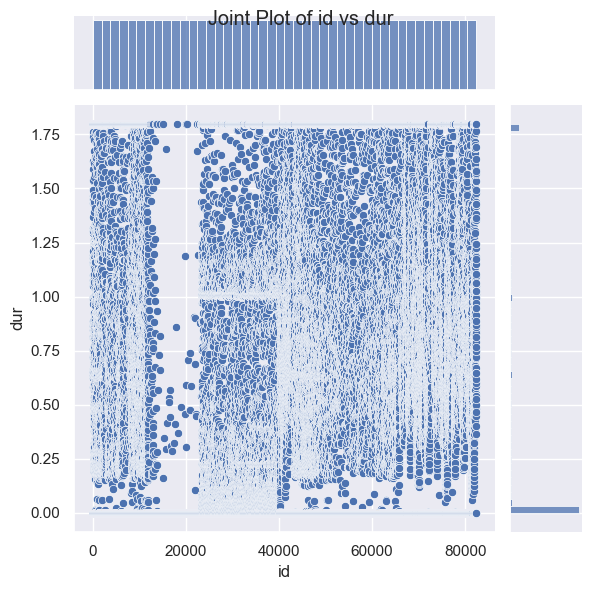

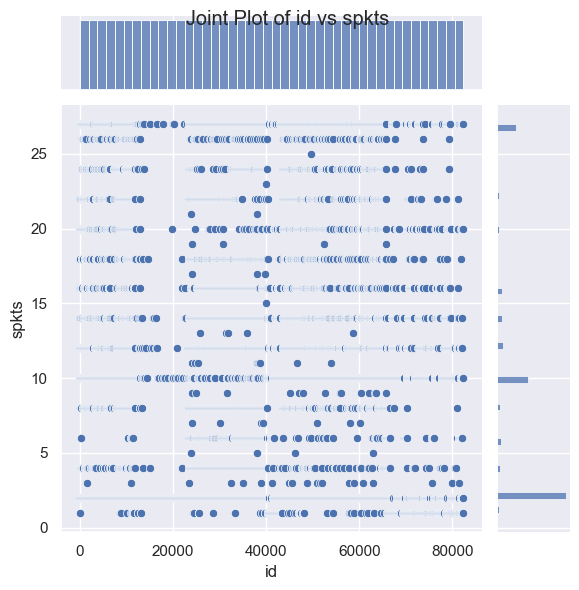

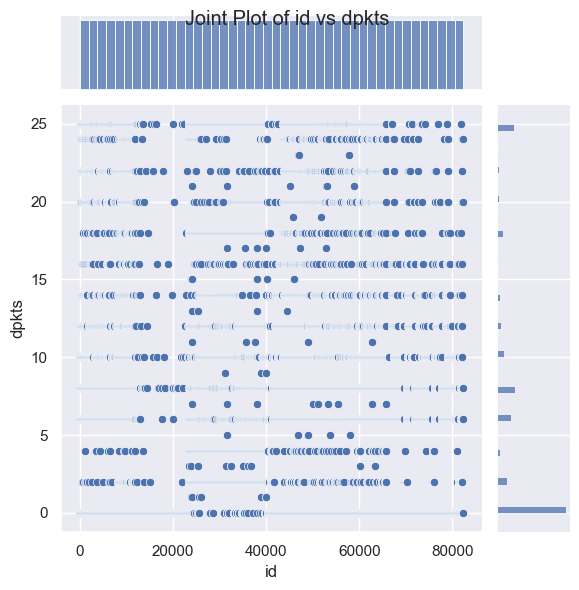

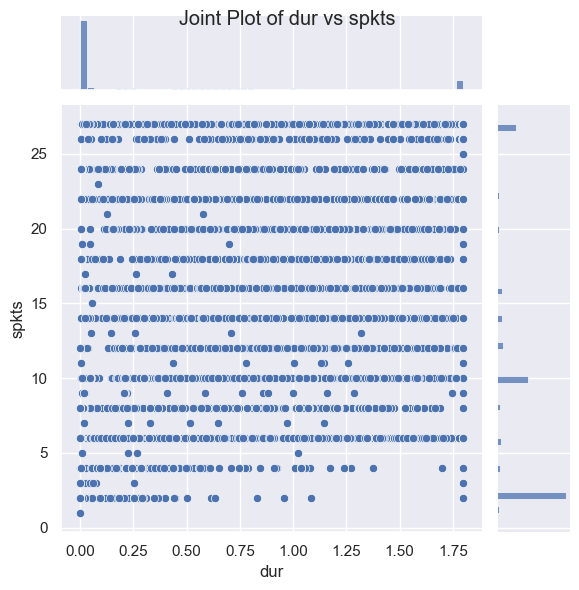

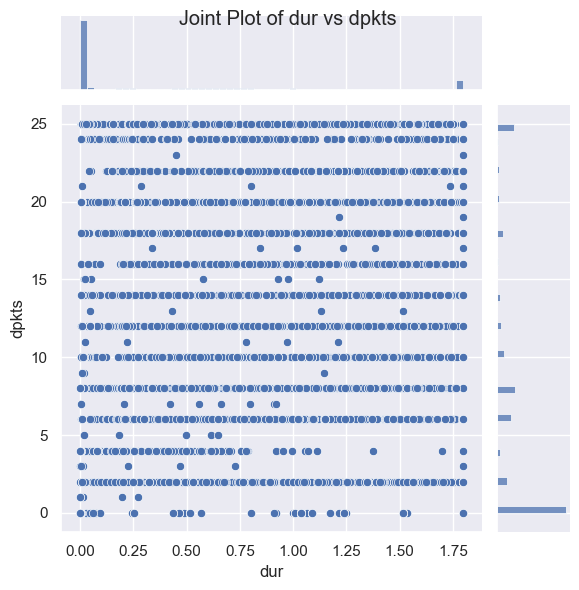

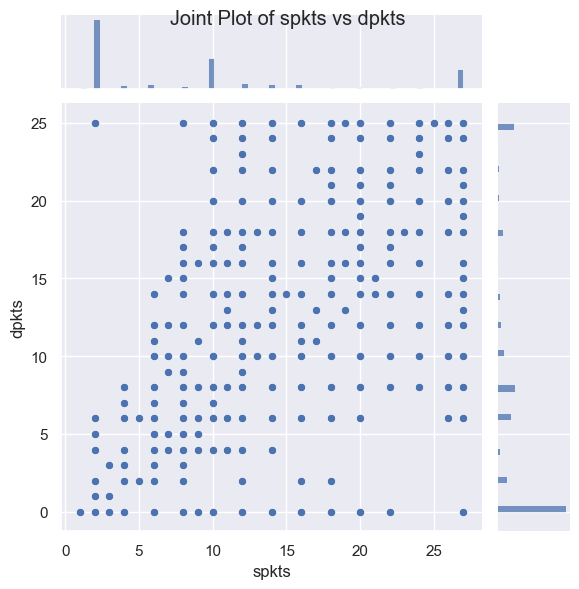

In [21]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create joint plots for each pair of numerical columns
for i in range(min(len(numerical_columns), 4)):  # Considering only the first five columns
    for j in range(i + 1, min(len(numerical_columns), 4)):  # Considering only the first five columns
        volume = numerical_columns[i]
        available_supply = numerical_columns[j]
        sns.jointplot(data=df, x=volume, y=available_supply, kind='scatter')
        plt.suptitle(f"Joint Plot of {volume} vs {available_supply}")
        plt.show()

In [21]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2.0,0,0,0,1,2.0,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2.0,0,0,0,1,2.0,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3.0,0,0,0,1,3.0,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3.0,0,0,0,2,3.0,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3.0,0,0,0,2,3.0,0,Normal,0


In [10]:
df['attack_cat'].value_counts()

attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64

In [11]:
df.replace({'Normal':0,'Generic':1,'Exploits':1,'Fuzzers':1,'DoS':1,'Reconnaissance':1,'Analysis':1,'Backdoor':1,'Shellcode':1,'Worms':1},inplace=True)

C:\Users\0819\AppData\Local\Temp\ipykernel_7252\4084347340.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Normal':0,'Generic':1,'Exploits':1,'Fuzzers':1,'DoS':1,'Reconnaissance':1,'Analysis':1,'Backdoor':1,'Shellcode':1,'Worms':1},inplace=True)


In [12]:
df['attack_cat'].value_counts()

attack_cat
1    45332
0    37000
Name: count, dtype: int64

In [13]:
df['service'].replace('-',np.NaN,inplace=True)
df['service'].value_counts().sum()

C:\Users\0819\AppData\Local\Temp\ipykernel_7252\413103140.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['service'].replace('-',np.NaN,inplace=True)


35179

In [14]:
cateogry_columns=df.select_dtypes(include=['object']).columns.tolist()
integer_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df:
    if df[column].isnull().any():
        if(column in cateogry_columns):
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].mean)

In [15]:
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,dns,INT,2,0,496,0,90909.090200,...,1,2.0,0,0,0,1,2.0,0,0,0
1,2,0.000008,udp,dns,INT,2,0,1762,0,125000.000300,...,1,2.0,0,0,0,1,2.0,0,0,0
2,3,0.000005,udp,dns,INT,2,0,1068,0,200000.005100,...,1,3.0,0,0,0,1,3.0,0,0,0
3,4,0.000006,udp,dns,INT,2,0,900,0,166666.660800,...,1,3.0,0,0,0,2,3.0,0,0,0
4,5,0.000010,udp,dns,INT,2,0,2126,0,100000.002500,...,1,3.0,0,0,0,2,3.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,dns,INT,2,0,104,0,200000.005100,...,1,2.0,0,0,0,2,1.0,0,0,0
82328,82329,1.106101,tcp,dns,FIN,20,8,3029,354,24.410067,...,1,1.0,0,0,0,3,2.0,0,0,0
82329,82330,0.000000,arp,dns,INT,1,0,46,0,0.000000,...,1,1.0,0,0,0,1,1.0,0,0,0
82330,82331,0.000000,arp,dns,INT,1,0,46,0,0.000000,...,1,1.0,0,0,0,1,1.0,0,0,0


In [16]:
le=LabelEncoder()
print(le)
df = df.astype(str)
df = df.apply(LabelEncoder().fit_transform)
df.head()

LabelEncoder()


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0,31241,117,1,4,11,0,1093,0,40100,...,0,6,0,0,0,0,11,0,0,0
1,11111,35363,117,1,4,11,0,421,0,3426,...,0,6,0,0,0,0,11,0,0,0
2,22222,35359,117,1,4,11,0,37,0,12909,...,0,7,0,0,0,0,18,0,0,0
3,33333,35360,117,1,4,11,0,1319,0,8121,...,0,7,0,0,0,8,18,0,0,0
4,44444,35328,117,1,4,11,0,610,0,1119,...,0,7,0,0,0,8,18,0,0,0


In [17]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0,31241,117,1,4,11,0,1093,0,40100,...,0,6,0,0,0,0,11,0,0,0
1,11111,35363,117,1,4,11,0,421,0,3426,...,0,6,0,0,0,0,11,0,0,0
2,22222,35359,117,1,4,11,0,37,0,12909,...,0,7,0,0,0,0,18,0,0,0
3,33333,35360,117,1,4,11,0,1319,0,8121,...,0,7,0,0,0,8,18,0,0,0
4,44444,35328,117,1,4,11,0,610,0,1119,...,0,7,0,0,0,8,18,0,0,0


In [18]:
df.to_csv('final.csv')

In [19]:
df['attack_cat'].value_counts()

attack_cat
1    45332
0    37000
Name: count, dtype: int64

In [20]:
x = df.drop(['attack_cat'],axis=1)
y = df['attack_cat']

In [21]:
x

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0,31241,117,1,4,11,0,1093,0,40100,...,0,0,6,0,0,0,0,11,0,0
1,11111,35363,117,1,4,11,0,421,0,3426,...,0,0,6,0,0,0,0,11,0,0
2,22222,35359,117,1,4,11,0,37,0,12909,...,0,0,7,0,0,0,0,18,0,0
3,33333,35360,117,1,4,11,0,1319,0,8121,...,1,0,7,0,0,0,8,18,0,0
4,44444,35328,117,1,4,11,0,610,0,1119,...,1,0,7,0,0,0,8,18,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,80366,35359,117,1,4,11,0,22,0,12909,...,0,0,6,0,0,0,8,0,0,0
82328,80367,29923,111,1,3,12,24,1001,720,16611,...,0,0,0,0,0,0,9,11,0,0
82329,80369,0,6,1,4,0,0,1075,0,0,...,0,0,0,0,0,0,0,0,0,0
82330,80370,0,6,1,4,0,0,1075,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
y

0        0
1        0
2        0
3        0
4        0
        ..
82327    0
82328    0
82329    0
82330    0
82331    0
Name: attack_cat, Length: 82332, dtype: int32

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [24]:
x_train

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
519,46668,34190,111,4,3,19,18,976,698,19320,...,0,0,0,0,0,0,8,0,0,1
9536,81819,35324,111,8,2,19,18,1001,698,12956,...,1,0,0,0,0,0,9,0,0,1
75180,72425,35349,111,1,5,11,0,1318,0,20502,...,0,0,10,0,0,0,10,21,0,0
60163,55740,35339,51,1,4,11,0,1294,0,20502,...,1,1,6,0,0,0,11,11,0,1
8737,80931,35324,77,1,4,19,0,1001,0,349,...,0,0,0,0,0,0,8,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,58512,10777,111,4,3,1,24,1256,698,34897,...,0,0,0,0,0,0,12,0,0,1
54886,49875,35324,111,4,3,19,18,1001,698,40313,...,0,0,0,0,0,0,8,0,0,1
76820,74247,15616,111,1,3,1,22,1112,705,23090,...,0,0,8,0,0,0,0,19,0,0
860,80789,31380,111,4,3,1,24,1228,720,4620,...,0,0,0,0,0,0,0,0,0,1


In [25]:
x_train.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpin', 'b', 'dtcpb',
       'dwtcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

In [26]:
y_train

519      1
9536     1
75180    0
60163    1
8737     1
        ..
6265     1
54886    1
76820    0
860      1
15795    1
Name: attack_cat, Length: 57632, dtype: int32

# **Model building**

**Random Forest Classifier**

Here is the accuracy score of the RF model: 0.9982186234817814
Here is the train accuracy score of the RF model: 0.9983863131593559
Here is the classification report of the RF model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11147
           1       1.00      1.00      1.00     13553

    accuracy                           1.00     24700
   macro avg       1.00      1.00      1.00     24700
weighted avg       1.00      1.00      1.00     24700

Here is the confusion matrix of the RF model:

[[11141     6]
 [   38 13515]]
Here is the AUC score of the RF model: 0.9983289656546153


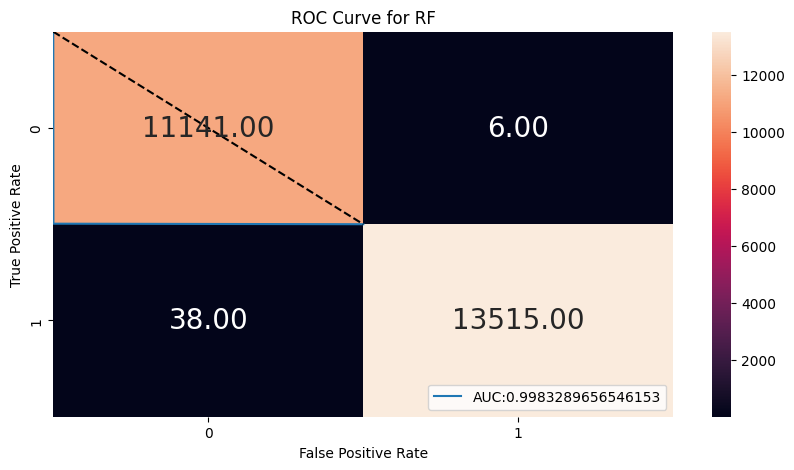

In [27]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

# Creating a KNN classifier
rf = RandomForestClassifier(ccp_alpha=0.024)

# Fitting the model on the training data
rf.fit(x_train, y_train)

# Predicting the values for the test data
y_pred = rf.predict(x_test)

# Printing the accuracy score of the model
print(f'Here is the accuracy score of the RF model: {accuracy_score(y_test, y_pred)}')
acc_rf = accuracy_score(y_test, y_pred)

# Getting the train accuracy
y_pred_train = rf.predict(x_train)
print(f'Here is the train accuracy score of the RF model: {accuracy_score(y_train, y_pred_train)}')

# Printing the classification report of the model
print(f'Here is the classification report of the RF model:\n\n{classification_report(y_test, y_pred)}')

# Printing the confusion matrix
print(f'Here is the confusion matrix of the RF model:\n\n{confusion_matrix(y_test, y_pred)}')

# Plotting the confusion matrix
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='0.2f', annot_kws={'size': 20})

# Printing the AUC score of the model
print(f'Here is the AUC score of the RF model: {roc_auc_score(y_test, y_pred)}')

# Plotting the ROC curve for the model
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC:{roc_auc_score(y_test, y_pred)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RF')
plt.legend(loc='lower right')
plt.show()

**Stacking Classifier**

Here is the accuracy score of the STC model: 1.0
Here is the train accuracy score of the STC model: 1.0
Here is the classification report of the STC model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11147
           1       1.00      1.00      1.00     13553

    accuracy                           1.00     24700
   macro avg       1.00      1.00      1.00     24700
weighted avg       1.00      1.00      1.00     24700

Here is the confusion matrix of the STC model:

[[11147     0]
 [    0 13553]]
Here is the AUC score of the STC model: 1.0


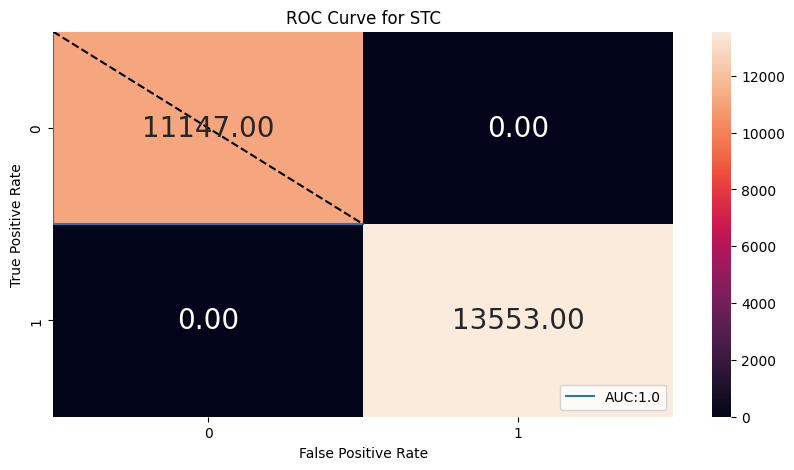

In [37]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


# Define base classifiers
base_classifiers = [ ('dt', DecisionTreeClassifier()), ('rf', RandomForestClassifier()), ('adb', AdaBoostClassifier()) ]

# Define the final estimator
final_estimator = LogisticRegression()

# Create the stacking classifier
STC = StackingClassifier( estimators=base_classifiers, final_estimator=final_estimator, cv=5 )

# Train the stacking classifier
STC.fit(x_train, y_train)

# Predicting the values for the test data
y_pred = STC.predict(x_test)

# Printing the accuracy score of the model
print(f'Here is the accuracy score of the STC model: {accuracy_score(y_test, y_pred)}')
acc_STC = accuracy_score(y_test, y_pred)

# Getting the train accuracy
y_pred_train = STC.predict(x_train)
print(f'Here is the train accuracy score of the STC model: {accuracy_score(y_train, y_pred_train)}')

# Printing the classification report of the model
print(f'Here is the classification report of the STC model:\n\n{classification_report(y_test, y_pred)}')

# Printing the confusion matrix
print(f'Here is the confusion matrix of the STC model:\n\n{confusion_matrix(y_test, y_pred)}')

# Plotting the confusion matrix
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='0.2f', annot_kws={'size': 20})

# Printing the AUC score of the model
print(f'Here is the AUC score of the STC model: {roc_auc_score(y_test, y_pred)}')

# Plotting the ROC curve for the model
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC:{roc_auc_score(y_test, y_pred)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for STC')
plt.legend(loc='lower right')
plt.show()

**Hyperparameter tunning code for satacking classifier**

In [41]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# # Define base models
# dt = DecisionTreeClassifier()
# rf = RandomForestClassifier()
# adb = AdaBoostClassifier()  # Instantiate AdaBoostClassifier
# lr = LogisticRegression()

# # Define the stacking classifier
# STC = StackingClassifier(estimators=[ ('dt', dt), ('rf', rf),('adb', adb) ], final_estimator=lr )

# Define the parameter grid for the base classifiers and the final estimator
param_grid = {
    'dt__max_depth': [None, 10, 20, 30],
    'dt__min_samples_split': [2, 5, 10],
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'adb__n_estimators': [50, 100, 200],
    'adb__learning_rate': [0.001, 0.01, 0.1, 1.0],
    'final_estimator__C': [0.1, 1.0, 10.0],
    'final_estimator__penalty': ['l2', None]
}


# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=STC, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, scoring='accuracy', verbose=1, error_score='raise')

# Fit the RandomizedSearchCV to the data
random_search.fit(x_train, y_train)  # Fit on the entire training set

# Print the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'rf__n_estimators': 200, 'rf__max_depth': 30, 'final_estimator__penalty': 'l2', 'final_estimator__C': 0.1, 'dt__min_samples_split': 2, 'dt__max_depth': 20, 'adb__n_estimators': 50, 'adb__learning_rate': 1.0}
Best cross-validation score: 1.00


Here is the accuracy score of the STC_hyp model: 1.0
Here is the train accuracy score of the STC_hyp model: 1.0
Here is the classification report of the STC_hyp model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11147
           1       1.00      1.00      1.00     13553

    accuracy                           1.00     24700
   macro avg       1.00      1.00      1.00     24700
weighted avg       1.00      1.00      1.00     24700

Here is the confusion matrix of the STC_hyp model:

[[11147     0]
 [    0 13553]]
Here is the AUC score of the STC_hyp model: 1.0


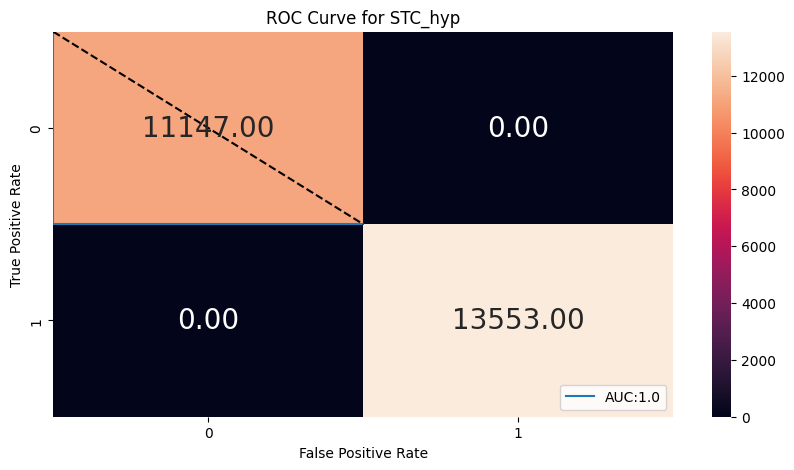

In [43]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


# Define base classifiers
base_classifiers = [ ('dt', DecisionTreeClassifier(min_samples_split = 2, max_depth = 20, ccp_alpha= 0.012)),
                     ('rf', RandomForestClassifier(n_estimators = 100, max_depth = 30, ccp_alpha= 0.012)),
                       ('adb', AdaBoostClassifier(n_estimators = 50, learning_rate = 1.0)) ]

# Define the final estimator
final_estimator = LogisticRegression(penalty = 'l2', C=0.1)

# Create the stacking classifier
STC_hyp = StackingClassifier( estimators=base_classifiers, final_estimator=final_estimator, cv=5 )

# Train the stacking classifier
STC_hyp.fit(x_train, y_train)

# Predicting the values for the test data
y_pred = STC_hyp.predict(x_test)

# Printing the accuracy score of the model
print(f'Here is the accuracy score of the STC_hyp model: {accuracy_score(y_test, y_pred)}')
acc_STC_hyp = accuracy_score(y_test, y_pred)

# Getting the train accuracy
y_pred_train = STC_hyp.predict(x_train)
print(f'Here is the train accuracy score of the STC_hyp model: {accuracy_score(y_train, y_pred_train)}')

# Printing the classification report of the model
print(f'Here is the classification report of the STC_hyp model:\n\n{classification_report(y_test, y_pred)}')

# Printing the confusion matrix
print(f'Here is the confusion matrix of the STC_hyp model:\n\n{confusion_matrix(y_test, y_pred)}')

# Plotting the confusion matrix
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='0.2f', annot_kws={'size': 20})

# Printing the AUC score of the model
print(f'Here is the AUC score of the STC_hyp model: {roc_auc_score(y_test, y_pred)}')

# Plotting the ROC curve for the model
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC:{roc_auc_score(y_test, y_pred)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for STC_hyp')
plt.legend(loc='lower right')
plt.show()

**SUPPORT VECTOR MACHINE**

Here is the accuracy score of the SVM model: 0.9078137651821863
Here is the train accuracy score of the SVM model: 0.9088006662965019
Here is the classification report of the SVM model:

              precision    recall  f1-score   support

           0       0.91      0.88      0.90     11147
           1       0.90      0.93      0.92     13553

    accuracy                           0.91     24700
   macro avg       0.91      0.91      0.91     24700
weighted avg       0.91      0.91      0.91     24700

Here is the confusion matrix of the SVM model:

[[ 9811  1336]
 [  941 12612]]
Here is the AUC score of the SVM model: 0.905358001263092


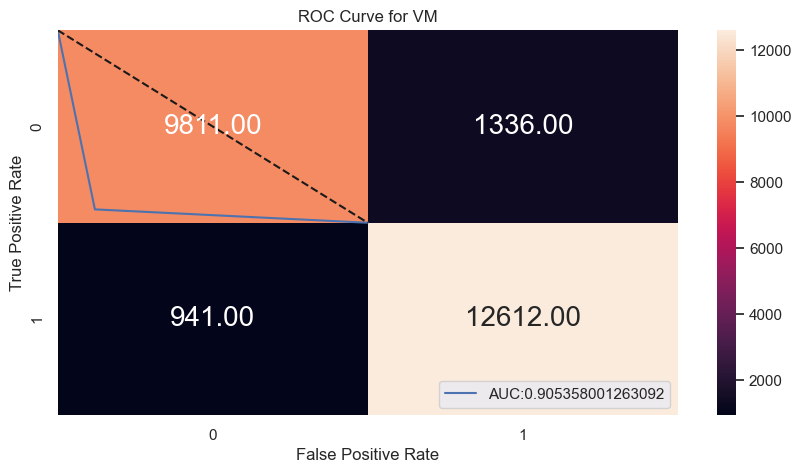

In [45]:
from sklearn.svm import SVC

# Creating a logistic regression classifier
svm = SVC()

# Fitting the model on the training data
svm.fit(x_train, y_train)

# Predicting the values for the test data
y_pred = svm.predict(x_test)

# Printing the accuracy score of the model
print(f'Here is the accuracy score of the SVM model: {accuracy_score(y_test, y_pred)}')
acc_svm= accuracy_score(y_test, y_pred)

# Getting the train accuracy
y_pred_train = svm.predict(x_train)
print(f'Here is the train accuracy score of the SVM model: {accuracy_score(y_train, y_pred_train)}')

# Printing the classification report of the model
print(f'Here is the classification report of the SVM model:\n\n{classification_report(y_test, y_pred)}')

# Printing the confusion matrix
print(f'Here is the confusion matrix of the SVM model:\n\n{confusion_matrix(y_test, y_pred)}')

# Plotting the confusion matrix
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='0.2f', annot_kws={'size': 20})

# Printing the AUC score of the model
print(f'Here is the AUC score of the SVM model: {roc_auc_score(y_test, y_pred)}')

# Plotting the ROC curve for the model
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC:{roc_auc_score(y_test, y_pred)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.show()

**CNN**

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming you have X_train, X_test, y_train, y_test from your dataset

# Encode categorical labels into numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
# X_train = x_train
# X_test = x_test
# Reshape data to fit the format required by CNN (add a channel dimension)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
cnn = Sequential([
    Conv1D(32, 1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(2),
    Conv1D(64, 1, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')  # Softmax for multiclass classification
])

# Compile the model for multiclass classification
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Sparse categorical cross-entropy for multiclass classification
              metrics=['accuracy'])  # Accuracy as a metric

# Train the model
cnn.fit(X_train, y_train_encoded, epochs=10, batch_size=128, validation_data=(X_test, y_test_encoded))




Epoch 1/10
451/451 [==============================] - 6s 10ms/step - loss: 0.0874 - accuracy: 0.9657 - val_loss: 0.0056 - val_accuracy: 0.9983
Epoch 2/10
451/451 [==============================] - 4s 9ms/step - loss: 0.0044 - accuracy: 0.9989 - val_loss: 0.0021 - val_accuracy: 0.9994
Epoch 3/10
451/451 [==============================] - 4s 8ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0011 - val_accuracy: 0.9997
Epoch 4/10
451/451 [==============================] - 4s 9ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 5.0143e-04 - val_accuracy: 0.9999
Epoch 5/10
451/451 [==============================] - 4s 9ms/step - loss: 7.4322e-04 - accuracy: 0.9998 - val_loss: 4.0992e-04 - val_accuracy: 0.9999
Epoch 6/10
451/451 [==============================] - 4s 9ms/step - loss: 3.2371e-04 - accuracy: 1.0000 - val_loss: 3.8925e-04 - val_accuracy: 0.9999
Epoch 7/10
451/451 [==============================] - 4s 9ms/step - loss: 5.5555e-04 - accuracy: 0.9998 - val_loss: 2.2269e-04 

In [57]:
# Make predictions on the test data
y_pred = cnn.predict(X_train)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate the confusion matrix
acc_cnn = accuracy_score(y_train_encoded, y_pred_classes)
print(acc_cnn)

1801/1801 [==============================] - 5s 2ms/step
1.0


In [56]:
# Make predictions on the test data
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate the confusion matrix
acc_cnn = accuracy_score(y_test_encoded, y_pred_classes)
print(acc_cnn)

772/772 [==============================] - 3s 3ms/step
1.0


In [59]:
# # Evaluate the model on test data
# loss, acc_cnn = cnn.evaluate(X_train, y_train_encoded)
# print(f'Accuracy: {acc_cnn * 100:.2f}%')

In [58]:
# # Evaluate the model on test data
# loss, acc_cnn = cnn.evaluate(X_test, y_test_encoded)
# print(f'Accuracy: {acc_cnn * 100:.2f}%')

772/772 [==============================] - 2s 3ms/step


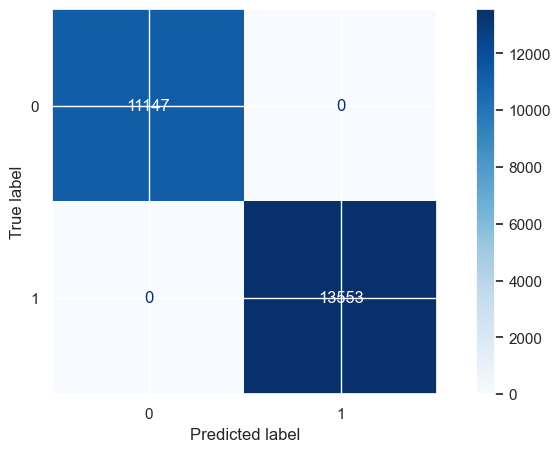

In [55]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


# $$Applying     k-best Feature     selection$$

1 .K-best feature selection is applied to select a subset of the most relevant features from a larger set of features in a dataset. This is done in order to reduce the complexity of the model, improve its accuracy and speed up the training process, while avoiding overfitting.

2 .Overfitting refers to the situation where the machine learning model performs well on the training data, but poorly on new, unseen data. This can happen when the model is too complex and includes irrelevant features that are not generalized by the model, leading to a poor fit to the new data. K-best feature selection tries to address this problem by selecting only the most relevant features for the model, discarding the less relevant ones, and preventing the model from fitting to noise in the data.

3 .By selecting only the k best features, where k is chosen based on experimentation and domain knowledge, the model becomes simpler, easier to interpret, and less prone to overfitting due to high dimensionality. K-best feature selection can be performed using statistical techniques, such as ANOVA F-value for classification, or mutual information for regression, among others. Different feature selection techniques have their own strengths and weaknesses, depending on the specific problem.

In [46]:
df=pd.read_csv('UNSW_NB15_training-set.csv')
df.head()

C:\Users\0819\AppData\Local\Temp\ipykernel_7252\1264314011.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('UNSW_NB15_training-set.csv')


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [47]:
df.replace({'Normal':0,'Generic':1,'Exploits':1,'Fuzzers':1,'DoS':1,'Reconnaissance':1,'Analysis':1,'Backdoor':1,'Shellcode':1,'Worms':1},inplace=True)
df['attack_cat'].value_counts()
# df['service'].replace('-',np.NaN,inplace=True)
df['service'].value_counts().sum()
cateogry_columns=df.select_dtypes(include=['object']).columns.tolist()
integer_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()
for column in df:
    if df[column].isnull().any():
        if(column in cateogry_columns):
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].mean)
le=LabelEncoder()
print(le)
df = df.astype(str)
df = df.apply(LabelEncoder().fit_transform)
df.head()

C:\Users\0819\AppData\Local\Temp\ipykernel_7252\2342450800.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Normal':0,'Generic':1,'Exploits':1,'Fuzzers':1,'DoS':1,'Reconnaissance':1,'Analysis':1,'Backdoor':1,'Shellcode':1,'Worms':1},inplace=True)


LabelEncoder()


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0,31241,117,0,4,89,0,3295,0,40102,...,0,11,0,0,0,0,11,0,0,0
1,11111,39818,117,0,4,89,0,947,0,3427,...,0,11,0,0,0,0,11,0,0,0
2,22222,39499,117,0,4,89,0,76,0,12910,...,0,22,0,0,0,0,22,0,0,0
3,33333,39622,117,0,4,89,0,4286,0,8122,...,0,22,0,0,0,11,22,0,0,0
4,44444,36336,117,0,4,89,0,1352,0,1119,...,0,22,0,0,0,11,22,0,0,0


In [48]:
X=df.drop('attack_cat',axis=1)
y=df['attack_cat']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 101, test_size = 0.3)

In [49]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([4.38024912e-02, 1.30059837e-01, 1.03588902e-01, 4.18589996e-03,
       1.91191784e-01, 5.64381939e-02, 4.09401767e-02, 7.99520702e-02,
       3.98763415e-02, 1.13471316e-02, 2.02215521e-01, 1.96486065e-01,
       5.64485945e-04, 5.90408755e-02, 6.97244209e-02, 3.58460868e-02,
       1.62371177e-02, 8.82677776e-03, 4.02409745e-02, 2.83354103e-02,
       9.57818102e-02, 3.39596463e-02, 3.50150014e-02, 7.24332772e-02,
       1.79775704e-02, 2.29360381e-02, 1.60854117e-02, 3.28972480e-02,
       9.76318935e-02, 4.56303028e-04, 1.11657586e-02, 3.28989536e-03,
       1.74878710e-01, 2.36092380e-03, 4.86070795e-02, 1.10671694e-01,
       3.40893641e-03, 4.98517863e-04, 0.00000000e+00, 4.93495142e-03,
       3.82975037e-03, 1.10950929e-02, 9.21280749e-03, 6.96146723e-01])

In [50]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

label                0.696147
sttl                 0.202216
dttl                 0.196486
state                0.191192
ct_state_ttl         0.174879
dur                  0.130060
ct_dst_sport_ltm     0.110672
proto                0.103589
dmean                0.097632
swin                 0.095782
sbytes               0.079952
dtcpb                0.072433
sloss                0.069724
dload                0.059041
spkts                0.056438
ct_src_dport_ltm     0.048607
id                   0.043802
dpkts                0.040940
sjit                 0.040241
dbytes               0.039876
dloss                0.035846
b                    0.035015
stcpin               0.033960
smean                0.032897
djit                 0.028335
synack               0.022936
dwtcprtt             0.017978
sinpkt               0.016237
ackdat               0.016085
rate                 0.011347
response_body_len    0.011166
ct_srv_dst           0.011095
is_sm_ips_ports      0.009213
dinpkt    

In [51]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.04264441, 0.12734104, 0.09751852, 0.00312914, 0.18963745,
       0.05153181, 0.04865714, 0.07884521, 0.03895789, 0.01480354,
       0.19870509, 0.19586851, 0.00426589, 0.0590299 , 0.06926096,
       0.03417461, 0.01521178, 0.005291  , 0.04466764, 0.03244116,
       0.09436707, 0.03108353, 0.03506824, 0.07557229, 0.01925353,
       0.02062282, 0.0126303 , 0.03172648, 0.09542767, 0.        ,
       0.00895021, 0.01059933, 0.17204686, 0.        , 0.04922015,
       0.10840695, 0.00443284, 0.        , 0.00260319, 0.0050091 ,
       0.        , 0.00869533, 0.00910146, 0.69535723])

In [52]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['dur', 'proto', 'state', 'sttl', 'dttl', 'swin', 'dmean',
       'ct_state_ttl', 'ct_dst_sport_ltm', 'label'],
      dtype='object')

In [53]:
# Define the list of columns you want to select
columns_to_select =['dur', 'proto', 'state', 'dpkts', 'sttl', 'dttl', 'dload',
       'ct_state_ttl', 'ct_dst_sport_ltm', 'label']

# Create a new DataFrame with the selected columns
df1 = df[columns_to_select].copy()
df1.head()

,dur,proto,state,dpkts,sttl,dttl,dload,ct_state_ttl,ct_dst_sport_ltm,label
0,31241,117,4,0,2,0,0,2,0,0
1,39818,117,4,0,2,0,0,2,0,0
2,39499,117,4,0,2,0,0,2,0,0
3,39622,117,4,0,2,0,0,2,0,0
4,36336,117,4,0,2,0,0,2,0,0


In [54]:
from sklearn.cluster import KMeans
dist_df = []
sse = []
for num_clust in range(1, 10):
  km  = KMeans(n_clusters=num_clust)
  km.fit(df1)
  dist_df.append([num_clust, km.inertia_])

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default 

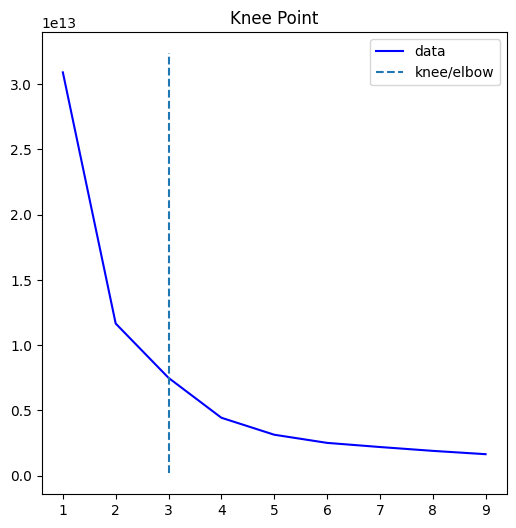

In [55]:
dist_df = pd.DataFrame(dist_df, columns=['num_of_cluster', 'distance'])
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), dist_df['distance'], curve="convex", direction="decreasing")
kl.elbow

kl.plot_knee()

In [19]:
# ! pip install kneed

In [56]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df1)
y_pred = kmeans.predict(df1)
df1['attack_cat'] = y_pred
df1['attack_cat'].value_counts()

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


attack_cat
1    44841
0    37491
Name: count, dtype: int64

In [57]:
df1.head()

,dur,proto,state,dpkts,sttl,dttl,dload,ct_state_ttl,ct_dst_sport_ltm,label,attack_cat
0,31241,117,4,0,2,0,0,2,0,0,1
1,39818,117,4,0,2,0,0,2,0,0,1
2,39499,117,4,0,2,0,0,2,0,0,1
3,39622,117,4,0,2,0,0,2,0,0,1
4,36336,117,4,0,2,0,0,2,0,0,1


In [58]:
df1.to_csv('test.csv')

In [59]:
X=df1.drop('attack_cat',axis=1)
y=df1['attack_cat']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 101, test_size = 0.3)

In [60]:
X_train

,dur,proto,state,dpkts,sttl,dttl,dload,ct_state_ttl,ct_dst_sport_ltm,label
682,39818,70,4,0,2,0,0,2,21,1
7473,38879,118,4,0,2,0,0,2,21,1
35061,39369,77,5,0,1,0,0,0,27,0
66842,39887,117,4,0,2,0,0,2,0,0
55274,22396,111,3,312,2,1,12994,1,0,1
...,...,...,...,...,...,...,...,...,...,...
55293,39214,117,4,0,2,0,0,2,28,1
49751,39818,71,4,0,2,0,0,2,27,1
5695,16213,111,3,399,2,1,27048,1,0,1
73542,35285,111,3,30,2,1,15575,1,0,0


In [61]:
X_train.to_csv('finaldata___1.csv')

In [62]:
y_train

682      1
7473     1
35061    1
66842    1
55274    0
        ..
55293    1
49751    1
5695     0
73542    1
45919    1
Name: attack_cat, Length: 57632, dtype: int32

# **Model Building**

**Random Forest after K-Best**

Here is the accuracy score of the RF model: 0.9515384615384616
Here is the train accuracy score of the RF model: 0.9500104108828429
Here is the classification report of the RF model:

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     10556
           1       0.97      0.94      0.96     14144

    accuracy                           0.95     24700
   macro avg       0.95      0.95      0.95     24700
weighted avg       0.95      0.95      0.95     24700

Here is the confusion matrix of the RF model:

[[10148   408]
 [  789 13355]]
Here is the AUC score of the RF model: 0.9527828123955153


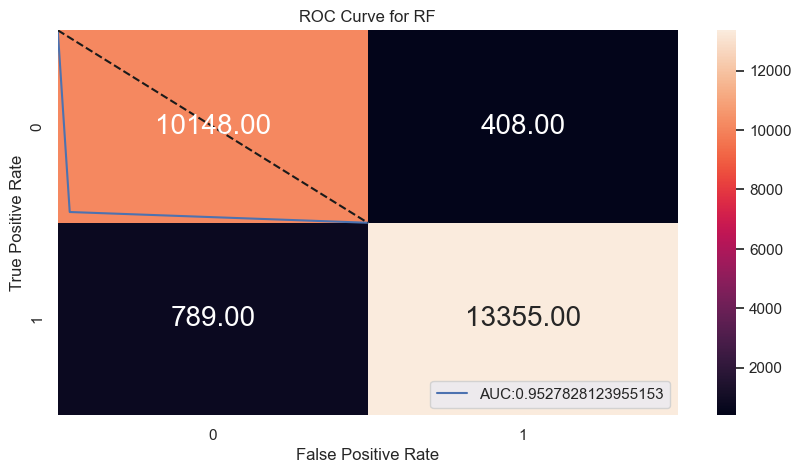

In [83]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

# Creating a KNN classifier
rf1 = RandomForestClassifier(ccp_alpha=0.024)

# Fitting the model on the training data
rf1.fit(X_train, y_train)

# Predicting the values for the test data
y_pred = rf1.predict(X_test)

# Printing the accuracy score of the model
print(f'Here is the accuracy score of the RF model: {accuracy_score(y_test, y_pred)}')
acc_rf1 = accuracy_score(y_test, y_pred)

# Getting the train accuracy
y_pred_train = rf1.predict(X_train)
print(f'Here is the train accuracy score of the RF model: {accuracy_score(y_train, y_pred_train)}')

# Printing the classification report of the model
print(f'Here is the classification report of the RF model:\n\n{classification_report(y_test, y_pred)}')

# Printing the confusion matrix
print(f'Here is the confusion matrix of the RF model:\n\n{confusion_matrix(y_test, y_pred)}')

# Plotting the confusion matrix
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='0.2f', annot_kws={'size': 20})

# Printing the AUC score of the model
print(f'Here is the AUC score of the RF model: {roc_auc_score(y_test, y_pred)}')

# Plotting the ROC curve for the model
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC:{roc_auc_score(y_test, y_pred)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RF')
plt.legend(loc='lower right')
plt.show()

**Stacking Classifier After K-Best**

Here is the accuracy score of the STC model: 0.9993927125506072
Here is the train accuracy score of the STC model: 1.0
Here is the classification report of the STC model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11370
           1       1.00      1.00      1.00     13330

    accuracy                           1.00     24700
   macro avg       1.00      1.00      1.00     24700
weighted avg       1.00      1.00      1.00     24700

Here is the confusion matrix of the STC model:

[[11363     7]
 [    8 13322]]
Here is the AUC score of the STC model: 0.9993920973647106


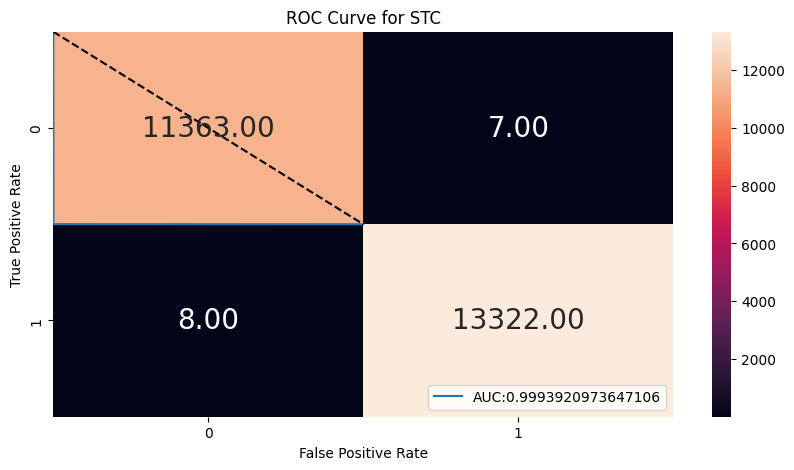

In [63]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


# Define base classifiers
base_classifiers = [ ('dt', DecisionTreeClassifier()), ('rf', RandomForestClassifier()), ('svc', SVC()) ]

# Define the final estimator
final_estimator = LogisticRegression()

# Create the stacking classifier
STC1 = StackingClassifier( estimators=base_classifiers, final_estimator=final_estimator, cv=5 )

# Train the stacking classifier
STC1.fit(X_train, y_train)

# Predicting the values for the test data
y_pred = STC1.predict(X_test)

# Printing the accuracy score of the model
print(f'Here is the accuracy score of the STC model: {accuracy_score(y_test, y_pred)}')
acc_STC1 = accuracy_score(y_test, y_pred)

# Getting the train accuracy
y_pred_train = STC1.predict(X_train)
print(f'Here is the train accuracy score of the STC model: {accuracy_score(y_train, y_pred_train)}')

# Printing the classification report of the model
print(f'Here is the classification report of the STC model:\n\n{classification_report(y_test, y_pred)}')

# Printing the confusion matrix
print(f'Here is the confusion matrix of the STC model:\n\n{confusion_matrix(y_test, y_pred)}')

# Plotting the confusion matrix
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='0.2f', annot_kws={'size': 20})

# Printing the AUC score of the model
print(f'Here is the AUC score of the STC model: {roc_auc_score(y_test, y_pred)}')

# Plotting the ROC curve for the model
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC:{roc_auc_score(y_test, y_pred)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for STC')
plt.legend(loc='lower right')
plt.show()

**Support Vector Machine**

Here is the accuracy score of the SVM model: 0.9991497975708502
Here is the train accuracy score of the SVM model: 0.9991324264297612
Here is the classification report of the SVM model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11368
           1       1.00      1.00      1.00     13332

    accuracy                           1.00     24700
   macro avg       1.00      1.00      1.00     24700
weighted avg       1.00      1.00      1.00     24700

Here is the confusion matrix of the SVM model:

[[11355    13]
 [    8 13324]]
Here is the AUC score of the SVM model: 0.9991281895606873


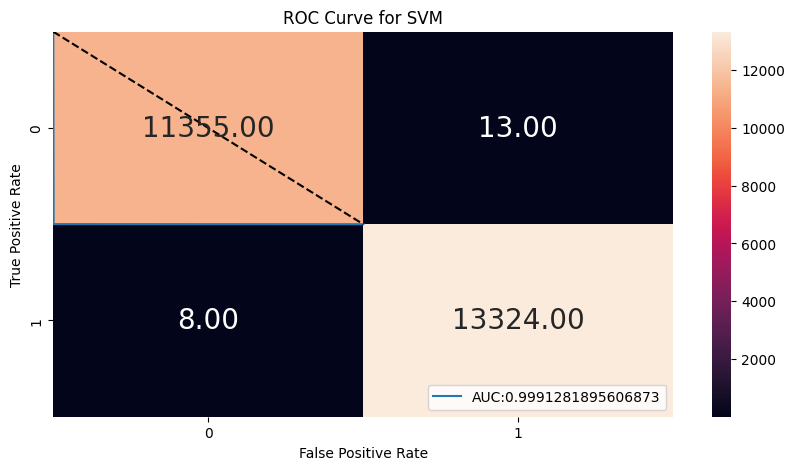

In [28]:
from sklearn.svm import SVC

# Creating a logistic regression classifier
svm1 = SVC()

# Fitting the model on the training data
svm1.fit(X_train, y_train)

# Predicting the values for the test data
y_pred = svm1.predict(X_test)

# Printing the accuracy score of the model
print(f'Here is the accuracy score of the SVM model: {accuracy_score(y_test, y_pred)}')
acc_svm1= accuracy_score(y_test, y_pred)

# Getting the train accuracy
y_pred_train = svm1.predict(X_train)
print(f'Here is the train accuracy score of the SVM model: {accuracy_score(y_train, y_pred_train)}')

# Printing the classification report of the model
print(f'Here is the classification report of the SVM model:\n\n{classification_report(y_test, y_pred)}')

# Printing the confusion matrix
print(f'Here is the confusion matrix of the SVM model:\n\n{confusion_matrix(y_test, y_pred)}')

# Plotting the confusion matrix
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='0.2f', annot_kws={'size': 20})

# Printing the AUC score of the model
print(f'Here is the AUC score of the SVM model: {roc_auc_score(y_test, y_pred)}')

# Plotting the ROC curve for the model
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC:{roc_auc_score(y_test, y_pred)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.show()

**CNN**

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming you have X_train, X_test, y_train, y_test from your dataset

# Encode categorical labels into numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# X_train = x_train
# X_test = x_test
# Reshape data to fit the format required by CNN (add a channel dimension)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
cnn = Sequential([
    Conv1D(32, 1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(2),
    Conv1D(64, 1, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')  # Softmax for multiclass classification
])

# Compile the model for multiclass classification
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Sparse categorical cross-entropy for multiclass classification
              metrics=['accuracy'])  # Accuracy as a metric

# Train the model
cnn.fit(X_train, y_train_encoded, epochs=10, batch_size=128, validation_data=(X_test, y_test_encoded))


Epoch 1/10
451/451 [==============================] - 4s 5ms/step - loss: 0.1769 - accuracy: 0.9273 - val_loss: 0.0852 - val_accuracy: 0.9675
Epoch 2/10
451/451 [==============================] - 2s 5ms/step - loss: 0.0738 - accuracy: 0.9705 - val_loss: 0.0482 - val_accuracy: 0.9833
Epoch 3/10
451/451 [==============================] - 2s 4ms/step - loss: 0.0522 - accuracy: 0.9797 - val_loss: 0.0328 - val_accuracy: 0.9907
Epoch 4/10
451/451 [==============================] - 2s 4ms/step - loss: 0.0418 - accuracy: 0.9849 - val_loss: 0.0316 - val_accuracy: 0.9902
Epoch 5/10
451/451 [==============================] - 2s 4ms/step - loss: 0.0379 - accuracy: 0.9853 - val_loss: 0.0234 - val_accuracy: 0.9931
Epoch 6/10
451/451 [==============================] - 2s 4ms/step - loss: 0.0323 - accuracy: 0.9878 - val_loss: 0.0202 - val_accuracy: 0.9945
Epoch 7/10
451/451 [==============================] - 2s 4ms/step - loss: 0.0298 - accuracy: 0.9891 - val_loss: 0.0199 - val_accuracy: 0.9931
Epoch 

In [30]:
# Make predictions on the test data
y_pred = cnn.predict(X_train)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate the confusion matrix
acc_cnn = accuracy_score(y_train_encoded, y_pred_classes)
print(acc_cnn)

1801/1801 [==============================] - 2s 1ms/step
0.9937881732370905


772/772 [==============================] - 1s 1ms/step


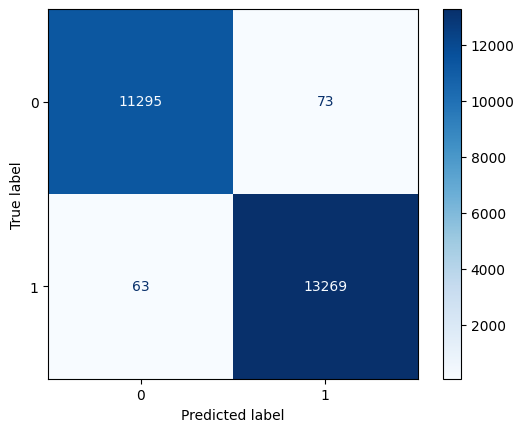

In [31]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


# **Prediction**

In [ ]:
abc=[64778,	39818,	1244,	3427,	0,	4	,0	,0,	2,	1]
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
result=logreg.predict([abc])
result=result[0]
if result==0:
    print("Normal")
else:
    print("Attacked")

Normal


c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
abc=[27849,	39369,	2860,	32,	0,	27606,	0	,900,	0,	0]
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
result=logreg.predict([abc])
result=result[0]
if result==0:
    print("Normal")
else:
    print("Attacked")

Attacked


c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# $$THE-END$$